In [1]:
import pickle, io, os, toml, datetime, pathlib
import matplotlib.pyplot as plt
from openalea import mtg
from vmapplet import Options, Simulation
import vmapplet

### Example: Extracting the trunk's radius

In [2]:
with io.open('simulation.toml') as file:
    options = Options(**toml.loads(file.read()))

In [3]:
# Set the duration of the sumulation
options.general.date_start = datetime.date(1994, 5, 1)
options.general.date_end = datetime.date(2004, 5, 1)

In [4]:
# Write 'trunk_radius' to mtg every 1st and 15th day of any month
options.output.dates = [dict(day=1, month=month) for month in range(1, 13)]
# Export 'tree.trunk_radius' to mtg
options.output.attributes = dict(tree=['trunk_radius'])

In [5]:
# clear output files
%rm -f ./trunk_radius/*

In [6]:
simulation = Simulation(options=options, output_path='trunk_radius')
vmapplet.run(simulation)

In [7]:
trunk_radius = []
dates = []
for filename in sorted(os.listdir('trunk_radius')):
    path = pathlib.Path('trunk_radius') / filename
    with io.open(path, 'rb') as file:
        tree = pickle.load(file)
        dates.append(datetime.date.fromisoformat(path.stem))
        trunk_radius.append(tree.get_vertex_property(1)['trunk_radius'])

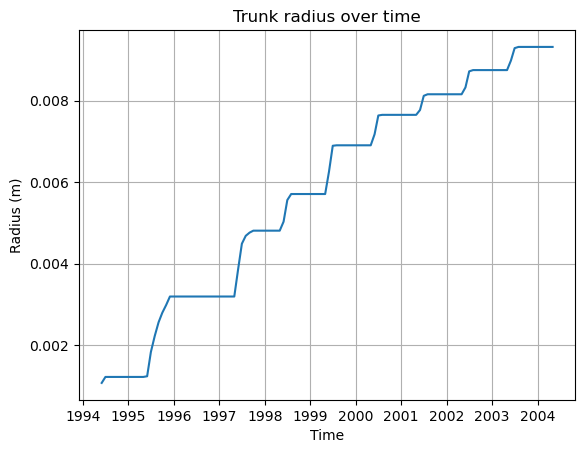

In [9]:
plt.plot(dates, trunk_radius)
plt.xlabel('Time')
plt.ylabel('Radius (m)')
plt.grid(True)
_ = plt.title('Trunk radius over time')